In [1]:
# Importing libraries
import os
import pickle
import warnings

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import string
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (accuracy_score, f1_score, precision_score,
                             recall_score)
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(101)

In [3]:
# Creating a list of stopwords
stopwords_list = list(stopwords.words('english'))
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [4]:
# Importing the datasets
train_data = pd.read_csv('train.csv')
valid_data = pd.read_csv('valid.csv')
test_data = pd.read_csv('test.csv')

In [5]:
train_data.sample(5)

,label,news
1080,True,Romney would turn Medicare into a voucher prog...
1183,True,"As the CEO of eBay, ""Whitman started a separat..."
269,True,Says federal law enforcement officers cut off ...
530,True,"Obama's tax plan cuts taxes ""for 95 percent of..."
2299,True,"He (Kirk) did violate Pentagon rules, twice ac..."


In [6]:
valid_data.sample(5)

,label,news
219,False,Unfortunately everyone needs to cut back in th...
368,True,The House-passed budget proposal could cut fun...
333,False,The (health care) law does not demand that all...
608,True,The Iran nuclear deal is putting billions of d...
159,True,The Georgia Department of Education has implem...


In [7]:
test_data.sample(5)

,label,news
532,False,Elorza wants to teach our public school childr...
495,False,"In one year, (President Obama) provided $90 bi..."
566,True,He was a member of the Iraq Study Group and wa...
102,True,"From 1980 to 1990, the top 1 percent saw their..."
983,True,"Says as a share of the US economy, the governm..."


In [8]:
print('Train dataset size: {}'.format(train_data.shape))
print('Valid dataset size: {}'.format(valid_data.shape))
print('Test dataset size: {}'.format(test_data.shape))

Train dataset size: (10240, 2)
Valid dataset size: (1284, 2)
Test dataset size: (1267, 2)


In [9]:
training_set = pd.concat([train_data, valid_data,test_data], ignore_index=True)
print('Training set size: {}'.format(training_set.shape))
training_set.sample(5)

Training set size: (12791, 2)


,label,news
4801,False,So many people were critical of Secretary (Joh...
1700,False,We in the Democratic Party had no input into t...
8662,True,Austin Energy is considering its first rate in...
11936,False,"In California, the windmills are killing hundr..."
11433,False,"Beyonce and Jay Z, I like them, I like them ....."


In [10]:
training_set.describe()

,label,news
count,12791,12791
unique,2,12765
top,True,On a cap-and-trade plan.
freq,7134,3


In [11]:
training_set.groupby('label').describe()

news                                      
      count unique                       top freq
label                                            
False  5657   5644  On a cap-and-trade plan.    3
True   7134   7125               On torture.    2

In [12]:
training_set['length'] = training_set['news'].apply(len)

In [13]:
training_set.head()

,label,news,length
0,False,Says the Annies List political group supports ...,82
1,True,When did the decline of coal start? It started...,141
2,True,"Hillary Clinton agrees with John McCain ""by vo...",105
3,False,Health care reform legislation is likely to ma...,78
4,True,The economic turnaround started at the end of ...,54


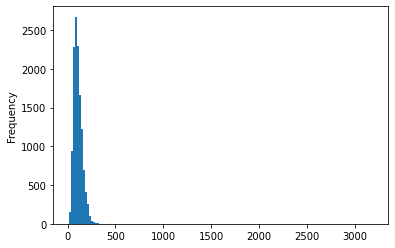

In [14]:
training_set['length'].plot.hist(bins = 150)

In [15]:
training_set['length'].describe()

count    12791.000000
mean       107.161520
std         63.452113
min         11.000000
25%         73.000000
50%         99.000000
75%        133.000000
max       3192.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f453ed18be0>,
      dtype=object)

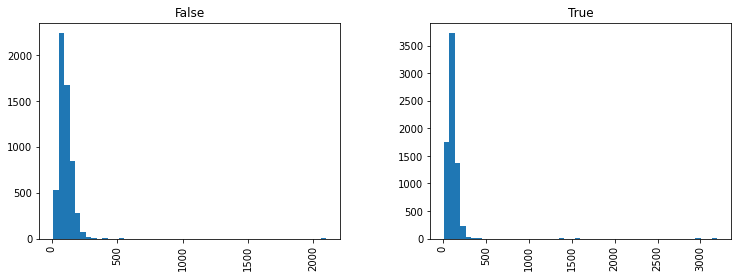

In [16]:
training_set.hist(column = 'length', by = 'label', figsize = (12,4),bins=50)

In [17]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [18]:
training_set.head()

,label,news,length
0,False,Says the Annies List political group supports ...,82
1,True,When did the decline of coal start? It started...,141
2,True,"Hillary Clinton agrees with John McCain ""by vo...",105
3,False,Health care reform legislation is likely to ma...,78
4,True,The economic turnaround started at the end of ...,54


In [19]:
training_set['news'].head(7).apply(text_process)

0    [Says, Annies, List, political, group, support...
1    [decline, coal, start, started, natural, gas, ...
2    [Hillary, Clinton, agrees, John, McCain, votin...
3    [Health, care, reform, legislation, likely, ma...
4           [economic, turnaround, started, end, term]
5    [Chicago, Bears, starting, quarterbacks, last,...
6    [Jim, Dunnam, lived, district, represents, years]
Name: news, dtype: object

In [20]:
training_set.head()

,label,news,length
0,False,Says the Annies List political group supports ...,82
1,True,When did the decline of coal start? It started...,141
2,True,"Hillary Clinton agrees with John McCain ""by vo...",105
3,False,Health care reform legislation is likely to ma...,78
4,True,The economic turnaround started at the end of ...,54


In [21]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(training_set['news'])

In [22]:
print(len(bow_transformer.vocabulary_))

16441


In [23]:
news_bow = bow_transformer.transform(training_set['news'])

In [24]:
print('Shape of Sparse Matrix: ', news_bow.shape)
print('Amount of Non-Zero occurences: ', news_bow.nnz)

Shape of Sparse Matrix:  (12791, 16441)
Amount of Non-Zero occurences:  137136


In [25]:
sparsity = (100.0 * news_bow.nnz / (news_bow.shape[0] * news_bow.shape[1]))
print('sparsity: {}'.format((sparsity)))

sparsity: 0.06521068308442556


In [26]:
tfidf_transformer = TfidfTransformer().fit(news_bow)

In [27]:
news_tfidf = tfidf_transformer.transform(news_bow)

In [28]:
print(news_tfidf.shape)

(12791, 16441)


In [29]:
msg_train,msg_test,lable_train,lable_test = \
train_test_split(training_set['news'],training_set['label'], test_size=0.2)
print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

10232 2559 12791


In [30]:
NB_pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()),  
])

In [31]:
NB_pipeline.fit(msg_train,lable_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f453ebca6a8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [32]:
NB_predictions = NB_pipeline.predict(msg_test)

In [33]:

print(classification_report(NB_predictions,lable_test))

              precision    recall  f1-score   support

       False       0.28      0.63      0.39       519
        True       0.86      0.60      0.71      2040

    accuracy                           0.60      2559
   macro avg       0.57      0.61      0.55      2559
weighted avg       0.75      0.60      0.64      2559



In [34]:
SVM_pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', SVC()),  
])

In [35]:
SVM_pipeline.fit(training_set['news'], training_set['label'])

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f453ebca6a8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0,

In [36]:
predictions_SVM = SVM_pipeline.predict(msg_test)

In [37]:
print(classification_report(predictions_SVM,lable_test))

              precision    recall  f1-score   support

       False       0.92      0.99      0.95      1068
        True       0.99      0.94      0.96      1491

    accuracy                           0.96      2559
   macro avg       0.95      0.96      0.96      2559
weighted avg       0.96      0.96      0.96      2559



In [38]:
PA_pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', PassiveAggressiveClassifier()),  
])

In [39]:
PA_pipeline.fit(training_set['news'], training_set['label'])

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f453ebca6a8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b...
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 PassiveAggressiveClassifier(C=1.0, average=False,
                                             class_weight=None,
                                             early_stopping=False,
       

In [40]:
predictions_PA = PA_pipeline.predict(msg_test)

In [41]:
print(classification_report(predictions_PA,lable_test))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      1143
        True       0.99      0.99      0.99      1416

    accuracy                           0.99      2559
   macro avg       0.99      0.99      0.99      2559
weighted avg       0.99      0.99      0.99      2559

